In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [23]:
from NEAT.genome import Genome

g1 = Genome(2, 3)

In [24]:
for i in range(20):
    g1.mutate()

In [25]:
for i in g1.nodes.genes:
    print(i.id, i.type)

1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN


In [26]:
list_edges = []
for nodes, conn in g1.connections.genes.items():
    print(nodes, conn.Weight, conn.Enabled, conn.Innovation)
    if conn.Enabled:
        list_edges.append(nodes)

(1, 3) -0.0009675591450624015 False 1
(1, 4) 1.3860000000000003 True 2
(1, 5) -0.7215462374400006 True 3
(2, 3) -0.002448000000000001 False 4
(2, 4) -1.2320000000000002 True 5
(2, 5) 0.9535125600000004 True 6
(2, 6) -0.0002899898678476804 True 11
(6, 3) 0.04561920000000001 True 8
(6, 4) -0.91 True 16
(1, 7) -0.0009675591450624015 True 9
(7, 3) 1 True 17


1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN


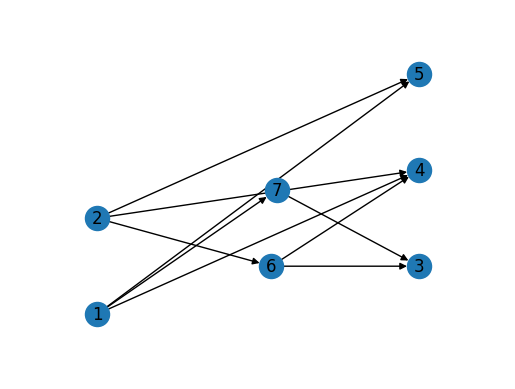

In [27]:
left_nodes = []
middle_nodes = []
right_nodes = []

for i in g1.nodes.genes:
    print(i.id, i.type)
    if i.type == "INPUT":
        left_nodes.append(i.id)
    elif i.type == "HIDDEN":
        middle_nodes.append(i.id)
    else:   # OUTPUT
        right_nodes.append(i.id)

pos = {n: (0, i) for i, n in enumerate(left_nodes)}
pos.update({n: (random.uniform(0.5, 1.5), i*random.uniform(0.5, 1.5) + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes)})

G = nx.DiGraph()
G.add_edges_from(list_edges)
nx.draw_networkx(G, pos)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [28]:
from NEAT.neural_network import NeuralNetwork

nn1 = NeuralNetwork(g1)
nn2 = NeuralNetwork(g1)

print(nn1.forward({1: 0.5, 2: 1.2}))
print(nn2.forward({1: 0.5, 2: 1.2}))


[-0.0005155294264015613, -1.5704833310643103, 0.7834419532800001]
[-0.0005155294264015613, -1.5704833310643103, 0.7834419532800001]


In [29]:
g2 = Genome(2, 3)
for i in range(20):
    g2.mutate()

In [30]:
for i in g2.nodes.genes:
    print(i.id, i.type)

1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN


In [31]:
list_edges2 = []
list_conn2 = []
for nodes, conn in g2.connections.genes.items():
    print(nodes, conn.Weight, conn.Enabled, conn.Innovation)
    list_conn2.append(conn)
    if conn.Enabled:
        list_edges2.append(nodes)

(1, 3) -2.854215000000001 True 1
(1, 4) 0.00047377249920000036 True 2
(1, 5) 0.0002366267904000003 False 3
(2, 3) 0.003971358720000003 False 4
(2, 4) 0.9317700000000002 True 5
(2, 5) 0.00030577414140000035 True 6
(2, 6) 0.21842472960000014 False 11
(6, 3) 0.00216 True 8
(2, 7) -0.07529034240000004 True 18
(7, 6) 0.11200000000000002 True 10


1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN


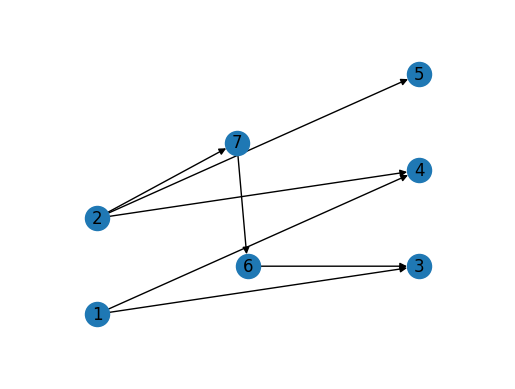

In [32]:
left_nodes2 = []
middle_nodes2 = []
right_nodes2 = []

for i in g2.nodes.genes:
    print(i.id, i.type)
    if i.type == "INPUT":
        left_nodes2.append(i.id)
    elif i.type == "HIDDEN":
        middle_nodes2.append(i.id)
    else:   # OUTPUT
        right_nodes2.append(i.id)

pos = {n: (0, i) for i, n in enumerate(left_nodes2)}
pos.update({n: (random.uniform(0.5, 1.5), i*random.uniform(0.5, 1.5) + 0.5) for i, n in enumerate(middle_nodes2)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes2)})

G2 = nx.DiGraph()
G2.add_edges_from(list_edges2)
nx.draw_networkx(G2, pos)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [33]:
nn = NeuralNetwork(g2)

print(nn.forward({1: 0.5, 2: 1.2}))

[-4.281366214175122, 1.1183608862496002, 0.0003669289696800004]


In [34]:
from NEAT.species import Species

g1.fitness = 1
g2.fitness = 0.5

gens = [g1, g2]

In [35]:
s = Species(.5, gens, 1, 1, 1)
offspring: Genome = s.cross_over(g1, g2)

In [36]:
for i in offspring.nodes.genes:
    print(i.id, i.type)

1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN


In [37]:
list_edges3 = []
for nodes, conn in offspring.connections.genes.items():
    print(nodes, conn.Weight, conn.Enabled, conn.Innovation)
    if conn.Enabled:
        list_edges3.append(nodes)

(2, 7) -0.07529034240000004 True 18
(7, 3) 1 True 17
(6, 4) -0.91 True 16
(2, 6) 0.10906736986607624 True 11
(7, 6) 0.11200000000000002 True 10
(1, 7) -0.0009675591450624015 True 9
(6, 3) 0.023889600000000007 True 8
(2, 5) 0.4769091670707002 True 6
(2, 4) -0.150115 True 5
(2, 3) 0.0007616793600000009 False 4
(1, 5) -0.36065480532480026 True 3
(1, 4) 0.6932368862496002 True 2
(1, 3) -1.4275912795725316 False 1


1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN


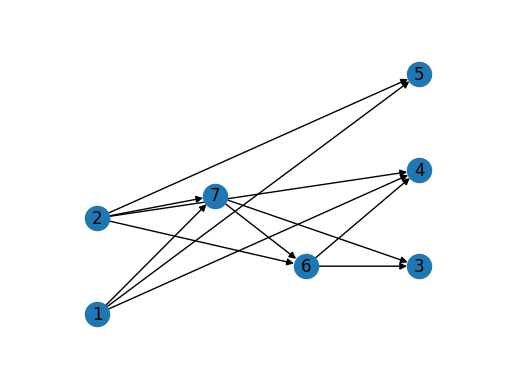

In [38]:
left_nodes3 = []
middle_nodes3 = []
right_nodes3 = []

for i in offspring.nodes.genes:
    print(i.id, i.type)
    if i.type == "INPUT":
        left_nodes3.append(i.id)
    elif i.type == "HIDDEN":
        middle_nodes3.append(i.id)
    else:   # OUTPUT
        right_nodes3.append(i.id)

pos = {n: (0, i) for i, n in enumerate(left_nodes3)}
pos.update({n: (random.uniform(0.5, 1.5), i*random.uniform(0.5, 1.5) + 0.5) for i, n in enumerate(middle_nodes3)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes3)})

G3 = nx.DiGraph()
G3.add_edges_from(list_edges3)
nx.draw_networkx(G3, pos)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [39]:
nn = NeuralNetwork(offspring)

print(nn.forward({1: 0.5, 2: 1.2}))

[-0.08482184224463288, 0.06932314205398943, 0.39196359782244006]
